In [1]:
import pandas as pd
import numpy as np
# For plotting
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [2]:
vehicles = pd.read_csv("s3://ml-ai-bucket/vehicles_feature_engineered.csv")
vehicles.head()

,Unnamed: 0,Unnamed: 0.1,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,0,27,7316814884,16,33590,2014.0,14,13873,2,8,2,57923.0,0,2,0,0,8,11,1
1,1,28,7316814758,16,22590,2010.0,7,14140,2,8,2,71229.0,0,2,0,0,8,1,1
2,2,29,7316814989,16,39590,2020.0,7,14163,2,8,2,19160.0,0,2,0,0,8,9,1
3,3,30,7316743432,16,30990,2017.0,38,16312,2,8,2,41124.0,0,2,0,0,8,9,1
4,4,31,7316356412,16,15000,2013.0,13,7107,0,6,2,128000.0,0,0,1,1,10,0,1


In [3]:
features_to_add = ["year", "manufacturer", "model", "condition", "cylinders", "fuel", "odometer", "title_status"]
X = pd.DataFrame(vehicles[features_to_add])
y = vehicles["price"]
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(187474, 8) (187474,) (92339, 8) (92339,)


In [4]:
model_results = {}

# Linear Regression Model

In [5]:
#Linear Regression Model 
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)


In [6]:
mse_test = mean_squared_error(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)
model_results = {"Linear Regression MSE": mse_test}
print(mse_test)
print(mae_test)

83050513.17129773
7198.757759403942


year             376.745560
manufacturer     -42.814988
model              0.110596
condition        767.565360
cylinders        362.706033
fuel           -2857.990758
odometer          -0.101038
title_status   -1742.654462
dtype: float64


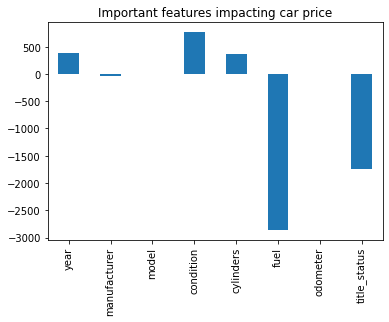

In [7]:
linear_coeffs = pd.Series(linear_reg.coef_, index=X_train.columns)
linear_coeffs.plot(kind='bar')
plt.title("Important features impacting car price")
print(linear_coeffs)

# Selecting Features for model performance


In [8]:
rfe = RFE(estimator=LinearRegression(), n_features_to_select=6, verbose=1)
rfe.fit(X_train, y_train)
X.columns[rfe.support_]

Fitting estimator with 8 features.
Fitting estimator with 7 features.


Index(['year', 'manufacturer', 'condition', 'cylinders', 'fuel',
       'title_status'],
      dtype='object')

In [9]:
# Removing the coeff with less value
features_to_add = ["year","condition", "manufacturer","fuel", "cylinders","title_status"]
X1 = pd.DataFrame(vehicles[features_to_add])
y1 = vehicles["price"]
X1_train, X1_test,y1_train, y1_test = train_test_split(X, y, test_size=0.33)
print(X1_train.shape, y1_train.shape, X1_test.shape, y1_test.shape)

(187474, 8) (187474,) (92339, 8) (92339,)


In [10]:
#Linear Regression Model 
linear_reg = LinearRegression()
linear_reg.fit(X1_train, y1_train)
y_pred_x1 = linear_reg.predict(X1_test)

In [11]:
mse_test = mean_squared_error(y1_test, y_pred_x1)
mae_test = mean_absolute_error(y1_test, y_pred_x1)
model_results = {"Linear Regression MSE with removing lower coeffs": mse_test}
print(mse_test)
print(mae_test)

83213909.39892961
7210.927169666321


# Ridge Regression Model

In [12]:
ridge_reg = Ridge(alpha = 10.0)
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)

In [14]:
ridge_mse_test = mean_squared_error(y_test, y_pred_ridge)
ridge_mae_test = mean_absolute_error(y_test,y_pred_ridge )
model_results = {"Ridge Regression": ridge_mse_test}
print(ridge_mse_test)
print(ridge_mae_test)

83050497.35168709
7198.752387703689


year             376.804750
manufacturer      40.739162
model              0.103008
condition        765.911736
cylinders        355.462974
fuel            2821.226311
odometer           0.101310
title_status    1709.211007
dtype: float64


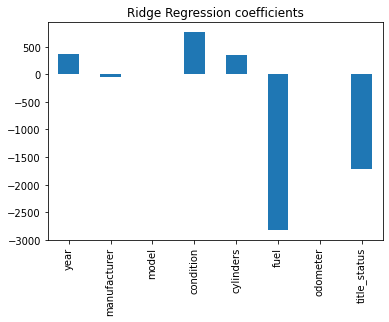

In [14]:
ridge_coeffs = pd.Series(ridge_reg.coef_, index=X_train.columns)
ridge_coeffs.plot(kind='bar')
plt.title("Ridge Regression coefficients")
print(abs(ridge_coeffs))

# Lasso Regression

In [23]:
#LAsso Regression Model 
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)

In [28]:
lasso_mse_test = mean_squared_error(y_test, y_pred_lasso)
lasso_mae_test = mean_absolute_error(y_test, y_pred_lasso)
model_results = {"Lasso Regression MSE": mse_test}
print(lasso_mse_test)
print(lasso_mae_test)

83159076.68200953
7206.674233794362


year             380.406234
manufacturer      41.400454
model              0.108476
condition        760.799608
cylinders        354.577338
fuel            2874.070027
odometer           0.100872
title_status    1733.930882
dtype: float64


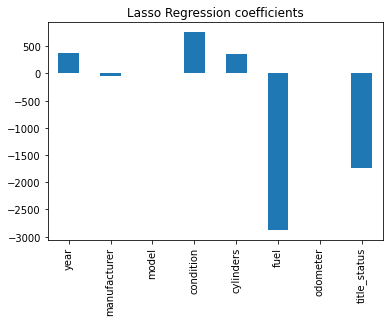

In [29]:
lasso_coeffs = pd.Series(lasso_reg.coef_, index=X_train.columns)
lasso_coeffs.plot(kind='bar')
plt.title("Lasso Regression coefficients")
print(abs(lasso_coeffs))